# On subs vessel per day

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
And put your API key in a `SIGNAL_OCEAN_API_KEY` environment variable.

## Description
We will generate an analysis over the last year regarding which vessels are 'On Subs' for every day around the load area of Houston

In [1]:
from datetime import date, timedelta,time
from signal_ocean import PortAPI, VesselClassAPI,PortFilter,VesselClassFilter,Connection
from signal_ocean.historical_tonnage_list import VesselFilter, PushType, MarketDeployment, CommercialStatus, VesselSubclass, OperationalStatus
from signal_ocean.historical_tonnage_list import HistoricalTonnageListAPI
from signal_ocean.historical_tonnage_list import IndexLevel

connection = Connection('262c367b7782482e99f09793570eee9a')

port_api = PortAPI(connection)
vessel_class_api = VesselClassAPI(connection)
htl_api = HistoricalTonnageListAPI(connection)
vessel_class = vessel_class_api.get_vessel_classes(VesselClassFilter(name_like='aframax'))[0]
port = port_api.get_ports(PortFilter(name_like='Ceyhan'))[0]
laycanEndInDays = 20
start_date = date.today() - timedelta(days=365)
end_date = date.today()

vessel_filter = VesselFilter(
    market_deployments=[MarketDeployment.RELET, MarketDeployment.SPOT],
    vessel_subclass=VesselSubclass.DIRTY,
    commercial_statuses= [CommercialStatus.ON_SUBS],
    latest_ais_since=5
)


htl_for_supply_trend = htl_api.get_historical_tonnage_list(
    port,
    vessel_class,
    laycanEndInDays,
    start_date,
    end_date,
    vessel_filter=vessel_filter,
    time=time(hour=6)
)

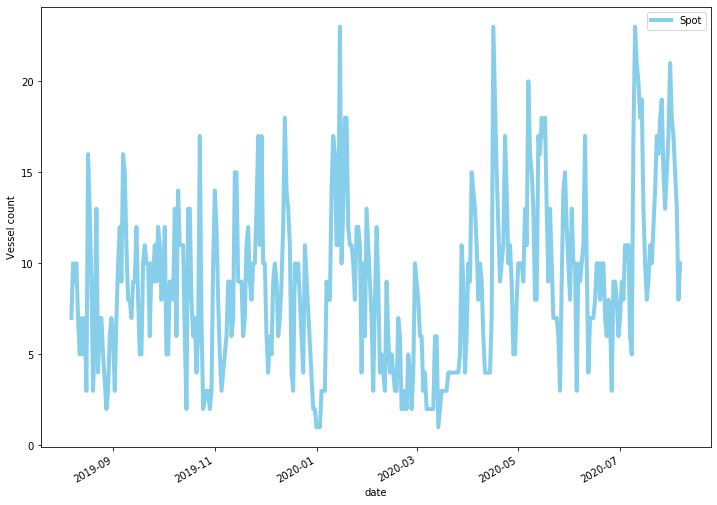

In [2]:
supply_trend_data_frame = htl_for_supply_trend.to_data_frame()
open_ports_of_interest = ['Fos']
open_ports_filter = supply_trend_data_frame.open_port_point_in_time.isin(open_ports_of_interest)
aggregatedData = supply_trend_data_frame.groupby(IndexLevel.DATE, sort=True).size()
ax = aggregatedData.plot(markerfacecolor='blue', color='skyblue', linewidth=4, label='Spot', figsize=(12, 9))

ax.set_ylabel('Vessel count')
ax.legend()
